In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import cv2

from import_class import DataHandler
from CNN_class import CNN_3

2025-02-06 11:39:35.399406: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-06 11:39:35.405513: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-06 11:39:35.412574: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-06 11:39:35.414619: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-06 11:39:35.420272: I tensorflow/core/platform/cpu_feature_guar

In [2]:
data_handler = DataHandler()

1 Physical GPUs, 1 Logical GPUs


I0000 00:00:1738867177.379153 2737207 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738867177.403800 2737207 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738867177.403901 2737207 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738867177.405284 2737207 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [3]:
train_dataset, val_dataset, X_test, y_test = data_handler.load_data("/home/bea/Documents/all_inputs_down_samp256.npy","/home/bea/Documents/all_targets_down_samp256.npy")

input shape: (3467, 256, 256, 1)
X test shape: (694, 256, 256, 1)


In [4]:
cnn = CNN_3((256,256,1),conv_dim=32,k_dim=3,pool_dim=3,pooling_type='average')

/home/bea/anaconda3/envs/tf2/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 254, 254, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 84, 84, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 84, 84, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 82, 82, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 82, 82, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 82, 82, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 27, 27, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 27, 27, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 25, 25, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 8, 8, 32)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        65,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,801 (331.25 KB)

 Trainable params: 84,609 (330.50 KB)

 Non-trainable params: 192 (768.00 B)

None


In [5]:
cnn.compile_model(learning_rate=1e-5)

In [6]:
training = cnn.train_model(train_data=train_dataset, patience=10, validation_data=val_dataset,checkpoint_path='best_256intensity_morepos.keras')

Epoch 1/1000


I0000 00:00:1738867185.905214 2737335 service.cc:146] XLA service 0x71d88c063ab0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738867185.905229 2737335 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 SUPER, Compute Capability 8.9
2025-02-06 11:39:45.926026: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-06 11:39:46.041464: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101


14/70 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5098 - loss: 0.7384

I0000 00:00:1738867188.460165 2737335 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.5208 - loss: 0.7188 - val_accuracy: 0.5387 - val_loss: 0.6914
Epoch 2/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5261 - loss: 0.6957 - val_accuracy: 0.5297 - val_loss: 0.6898
Epoch 3/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5328 - loss: 0.6904 - val_accuracy: 0.5387 - val_loss: 0.6919
Epoch 4/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5384 - loss: 0.6865 - val_accuracy: 0.5099 - val_loss: 0.6938
Epoch 5/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5563 - loss: 0.6817 - val_accuracy: 0.4973 - val_loss: 0.6966
Epoch 6/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5645 - loss: 0.6790 - val_accuracy: 0.4883 - val_loss: 0.7012
Epoch 7/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5675 - loss: 0.6771 - val_accuracy: 0.5243 - val_loss: 0.6973
Epoch 8/1000
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5874 - loss: 0.6717 - val_accuracy: 0.5189 

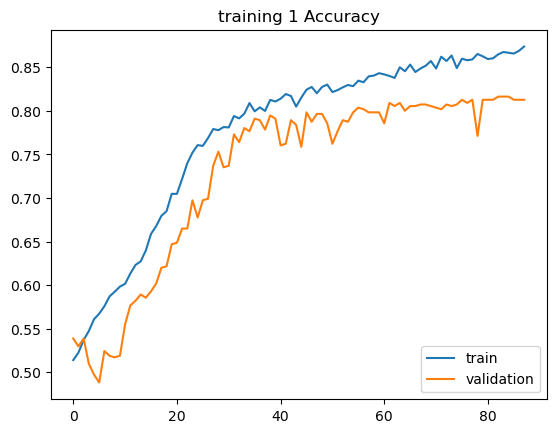

In [7]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.legend(['train', 'validation'], loc='lower right')
plt.title('training 1 Accuracy')
#plt.savefig('256intensity/training 1 accuracy.tiff')
plt.show()

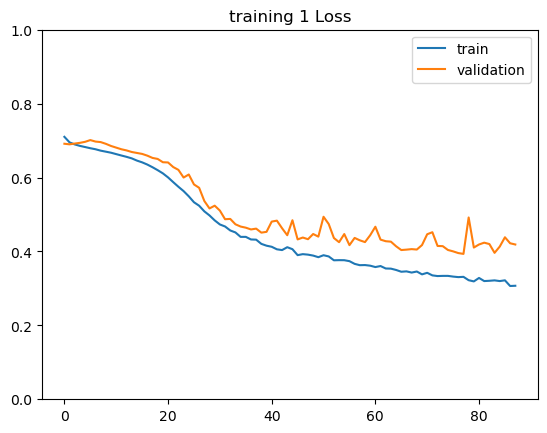

In [8]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.legend(['train','validation'])
plt.title('training 1 Loss')
plt.ylim(0,1)
#plt.savefig('256intensity/training 1 loss.tiff')
plt.show()

In [9]:
"max val accuracy: {0}, min val loss: {1}".format(max(training.history['val_accuracy']),min(training.history['val_loss']))

'max val accuracy: 0.816216230392456, min val loss: 0.3933483362197876'

Test with CNN_3 evaluate method from python class

In [10]:
CNN_3.evaluate_model(training,X_test=X_test,y_test=y_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8067 - loss: 0.4035


[0.3882196545600891, 0.8256484270095825]

Load in saved model

In [11]:
from tensorflow.keras.models import load_model

best_model = load_model('best_256intensity_morepos.keras')

In [12]:
X_test.shape

(694, 256, 256, 1)

Test best model on the test data set aside from the training data

In [13]:
test_loss, test_acc = best_model.evaluate(X_test, y_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8067 - loss: 0.4035


In [15]:
'Test loss:{0}, Test accuracy: {1}'.format(test_loss,test_acc)

'Test loss:0.31429523229599, Test accuracy: 0.848703145980835'

Load in independent test data

In [14]:
pos_input = np.load('/home/bea/Documents/positive_inputs_I256_testing.npy')
pos_target = np.load('/home/bea/Documents/positive_targets_I256_testing.npy')
neg_input = np.load('/home/bea/Documents/negative_inputs_I256_testing.npy')
neg_target = np.load('/home/bea/Documents/negative_targets_I256_testing.npy')

In [17]:
pos_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

In [15]:
print("Model expected input shape:", best_model.input_shape)
print("pos_input shape:", pos_input.shape)
print("pos_target shape:", pos_target.shape)

Model expected input shape: (None, 256, 256, 1)
pos_input shape: (157, 256, 256, 1)
pos_target shape: (157,)


In [16]:
print("Model expected input shape:", best_model.input_shape)
print("neg_input shape:", neg_input.shape)
print("neg_target shape:", neg_target.shape)

Model expected input shape: (None, 256, 256, 1)
neg_input shape: (40, 256, 256, 1)
neg_target shape: (40,)


In [19]:
test_loss, test_acc = best_model.evaluate(pos_input, pos_target)
'Test loss:{0}, Test accuracy: {1}'.format(test_loss,test_acc)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5024 - loss: 0.8803


'Test loss:0.8841070532798767, Test accuracy: 0.5031847357749939'

In [20]:
test_loss, test_acc = best_model.evaluate(neg_input, neg_target)
'Test loss:{0}, Test accuracy: {1}'.format(test_loss,test_acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.2354 - loss: 1.5447


'Test loss:1.492485761642456, Test accuracy: 0.2750000059604645'

In [40]:
# Predict the values from the testing dataset
Y_pred_probs = best_model.predict(test_x)
Y_pred = np.array(Y_pred_probs>=.5)
# compute the confusion matrix
#confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred) 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


Text(0, 0.5, 'freq')

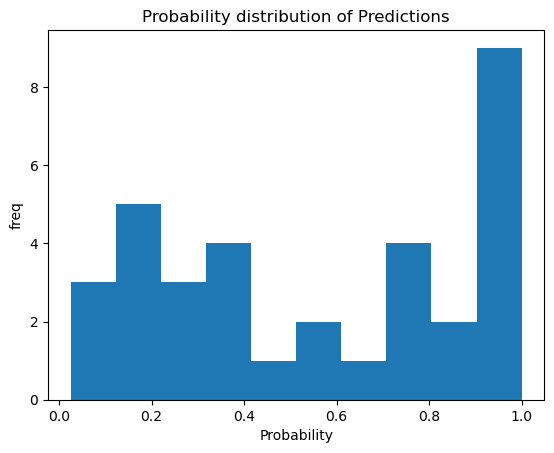

In [41]:
plt.hist(Y_pred_probs.flatten())
plt.title('Probability distribution of Predictions')
plt.xlabel('Probability')
plt.ylabel('freq')

Text(0, 0.5, 'freq')

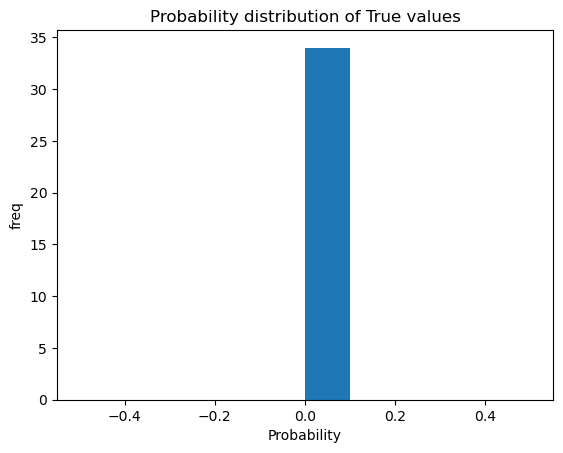

In [42]:
plt.hist(test_y)
plt.title('Probability distribution of True values')
plt.xlabel('Probability')
plt.ylabel('freq')

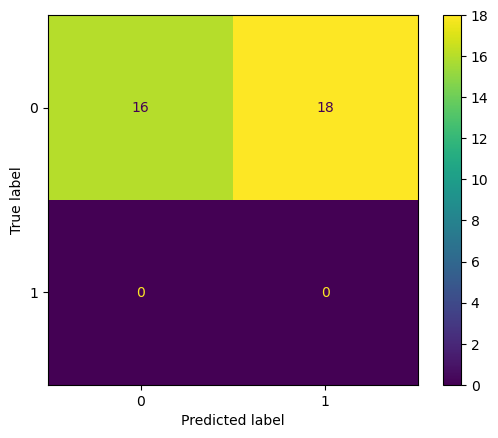

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_y, Y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [32]:
sk.metrics.accuracy_score(test_y, Y_pred)

0.2647058823529412

In [25]:
sk.metrics.precision_score(test_y, Y_pred)

0.0

In [26]:
sk.metrics.recall_score(test_y, Y_pred)

/home/user/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.0